In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

In [9]:
def plot_energies(filename):
    lines = file(filename).readlines()
    try:
        data = np.loadtxt(lines)
    except ValueError:
        data = np.loadtxt(lines[5:])
    energies = data[:,0]
    nwalkers = data[:,1]
    print np.mean(energies), np.std(energies)
    plt.subplot(211)
    plt.plot(energies)
    plt.subplot(212)
    plt.plot(nwalkers)
    return energies

0.501460989021 0.0213028295332


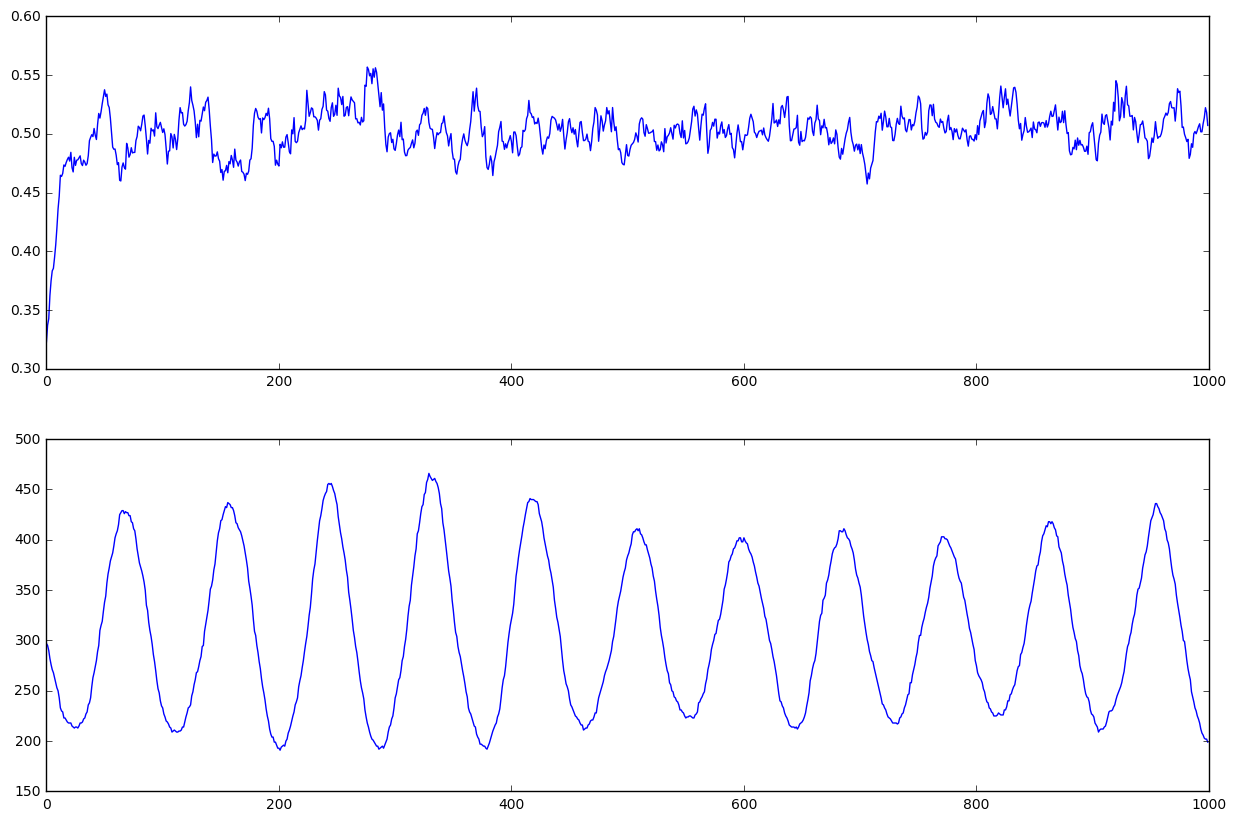

In [39]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0.75")

In [2]:
def monomer(omega, hbar=1.0):
    return (3./2) * hbar * omega

def alpha1(q, mu, omega):
    return q*q/(mu*omega*omega)

def alpha2(q, mu, omega, hbar=1.0):
    return (3./4) * (hbar/(mu*omega)) * alpha1(q, mu, omega)

def alpha3(q, mu, omega, hbar=1.0):
    return (5./4) * (hbar/(mu*omega))**2 * alpha1(q, mu, omega)

def C6(q, mu, omega, hbar=1.0):
    a1 = alpha1(q,mu,omega)
    return (3./4) * a1 * a1 * hbar * omega

def C8(q, mu, omega, hbar=1.0):
    a1 = alpha1(q, mu, omega)
    a2 = alpha2(q, mu, omega, hbar)
    return 5 * a1 * a2 * hbar * omega

def C10(q, mu, omega, hbar=1.0):
    c6 = C6(q, mu, omega, hbar)
    return (245./8) * (hbar/(mu*omega))**2 * c6

def dimer_dispersion(xs, q, mu, omega, terms=3, hbar=1.0):
    c6  = C6(q, mu, omega)
    c8  = C8(q, mu, omega, hbar)
    c10 = C10(q, mu, omega, hbar)
    answer = 2*monomer(omega, hbar)

    if terms >= 1:
        answer -= c6/xs**6
    if terms >= 2:
        answer -= c8/xs**8
    if terms >= 3:
        answer -= c10/xs**10

    return answer

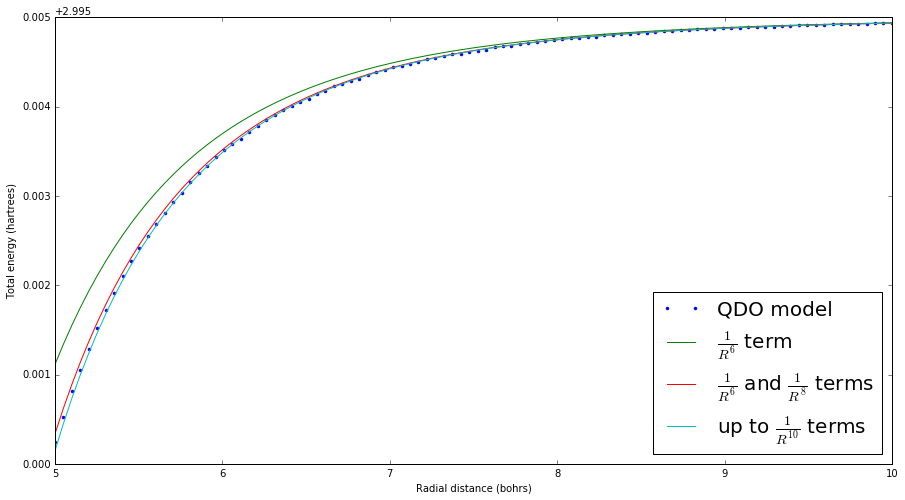

In [43]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-3.0-walkers-1e5-iters-4e4-configs-100")
xs = scan[:,0]

plt.plot(xs, scan[:,1], '.', label="QDO model")
plt.plot(xs, dimer_dispersion(xs, 3.0, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xs, dimer_dispersion(xs, 3.0, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xs, dimer_dispersion(xs, 3.0, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")

plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.legend(loc=4, prop={"size":20})

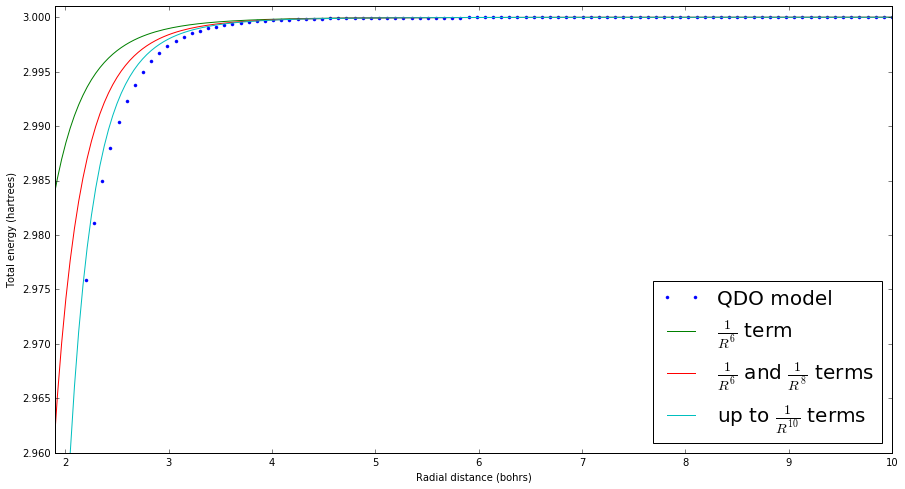

In [78]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-1.0-walkers-1e5-iters-4e4-configs-100-lower-2.2")
q = 1.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
xxs = np.linspace(1.8,xs[-1], 200)
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")

plt.ylim(ymin=2.96, ymax=3.001)
plt.xlim(xmin=1.9)

plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.legend(loc=4, prop={"size":20})

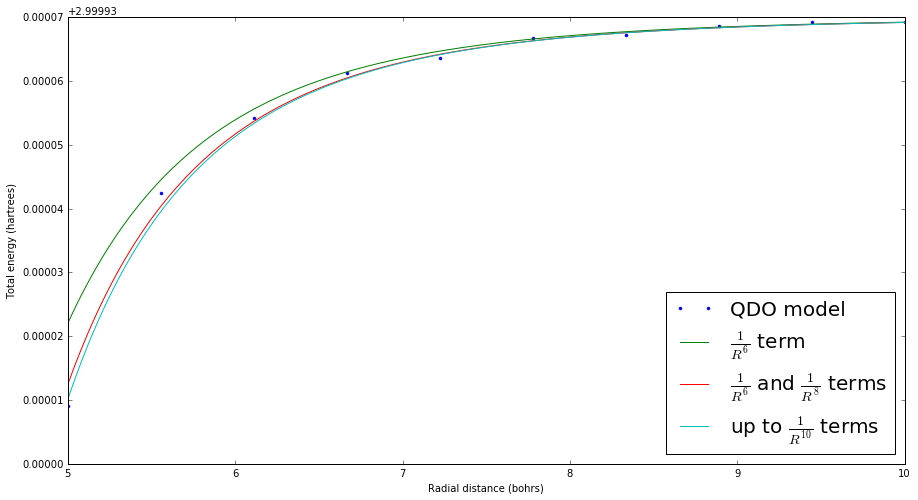

In [52]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-1.0-walkers-1e5-iters-4e4-configs-10")
q = 1.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
xxs = np.linspace(xs[0],xs[-1], 200)
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")

plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.legend(loc=4, prop={"size":20})

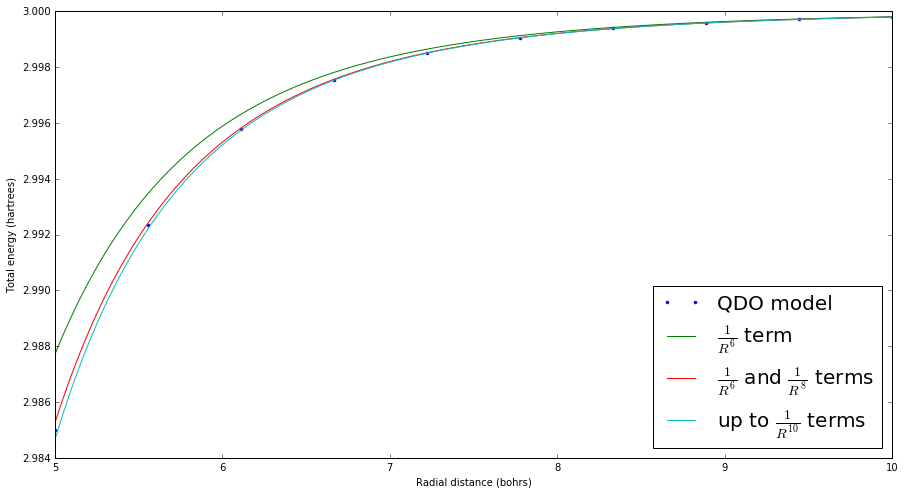

In [53]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-4.0-walkers-1e5-iters-4e4-configs-10")
q = 4.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
xxs = np.linspace(xs[0],xs[-1], 200)
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")

plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.legend(loc=4, prop={"size":20})

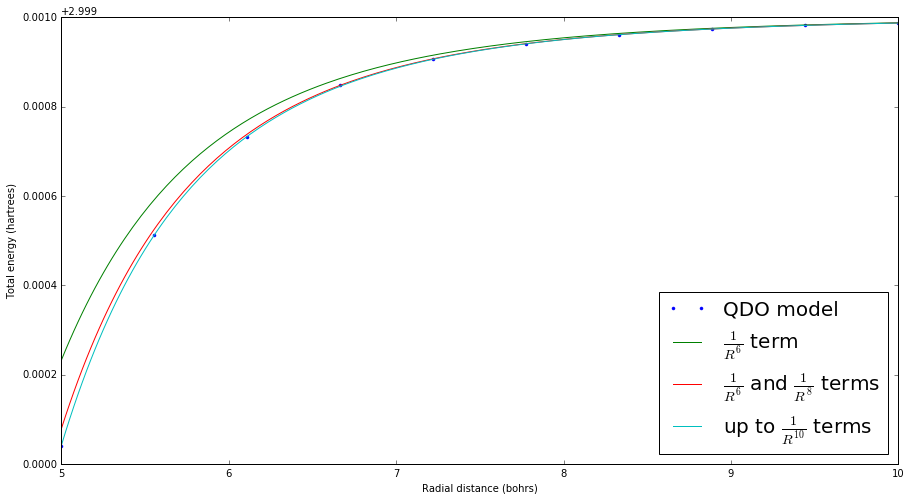

In [54]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-2.0-walkers-1e5-iters-4e4-configs-10")
q = 2.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
xxs = np.linspace(xs[0],xs[-1], 200)
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xxs, dimer_dispersion(xxs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")

plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.legend(loc=4, prop={"size":20})

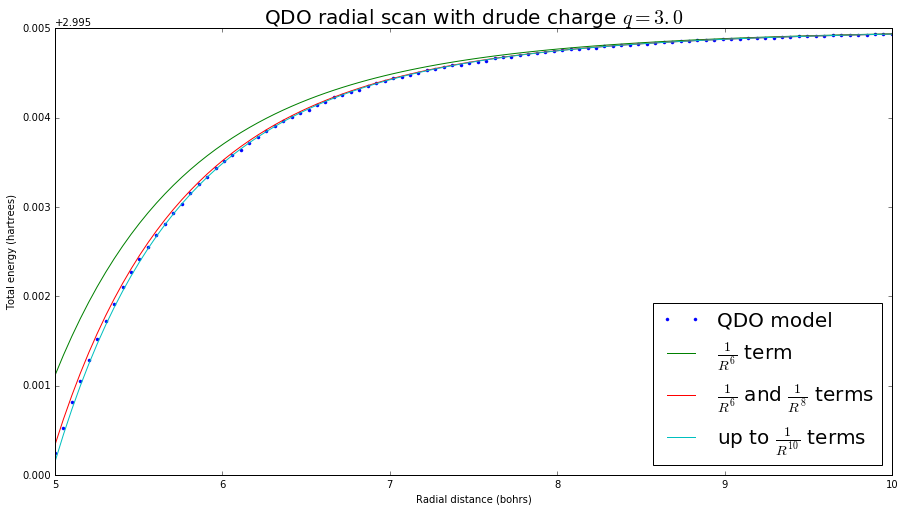

In [62]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-3.0-walkers-1e5-iters-4e4-configs-100")
q = 3.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")

plt.title("QDO radial scan with drude charge $q={}$".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.ylim(ymax=3.000)
plt.legend(loc=4, prop={"size":20})

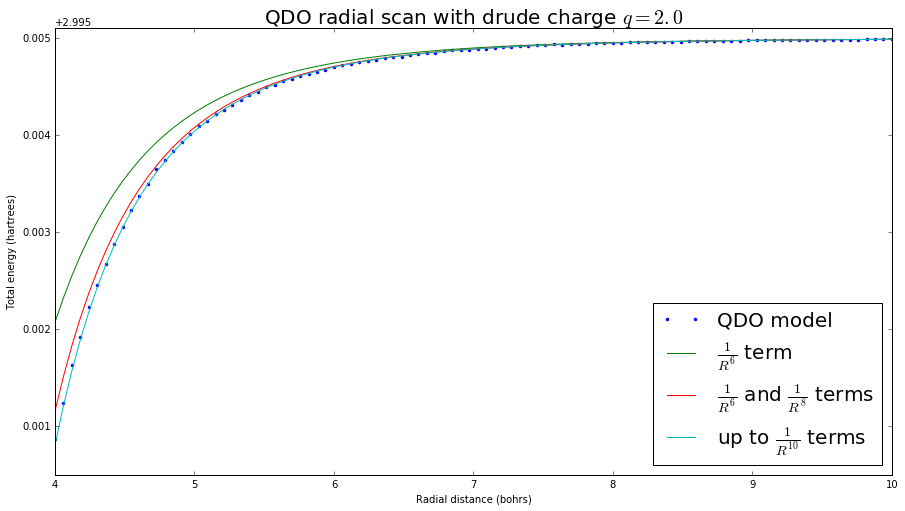

In [66]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-2.0-walkers-1e5-iters-4e4-configs-100-lower-4.0")
q = 2.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")

plt.title("QDO radial scan with drude charge $q={}$".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.ylim(ymax=3.0001)
plt.legend(loc=4, prop={"size":20})

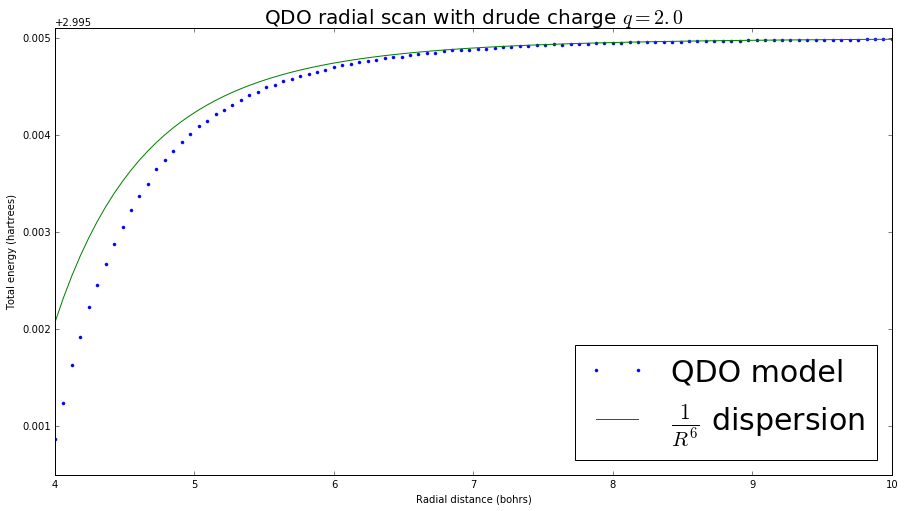

In [69]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/qdo-diatom-q-2.0-walkers-1e5-iters-4e4-configs-100-lower-4.0")
q = 2.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ dispersion")

plt.title("QDO radial scan with drude charge $q={}$".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
plt.ylim(ymax=3.0001)
plt.legend(loc=4, prop={"size":30})

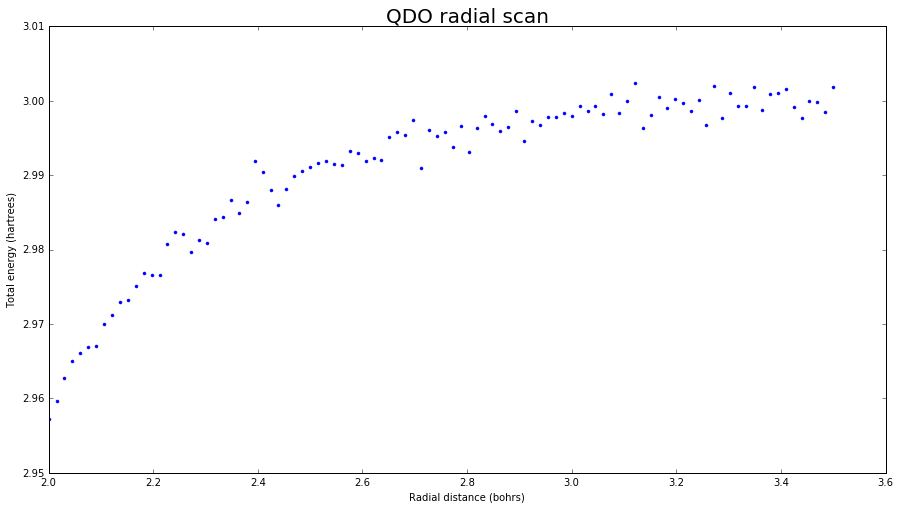

In [15]:
scan = np.loadtxt("./dmc-cuda/xenon-results")
q = 1.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.')
#plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ dispersion")

plt.title("QDO radial scan".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")

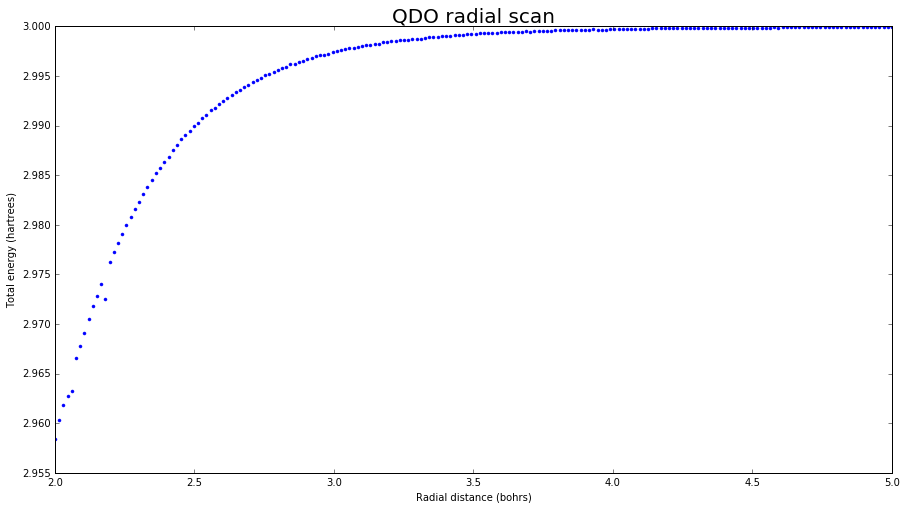

In [13]:
scan = np.loadtxt("./result-data/qdo-diatom-scan/xenon-results-5")
q = 1.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.')
#plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ dispersion")

plt.title("QDO radial scan".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")

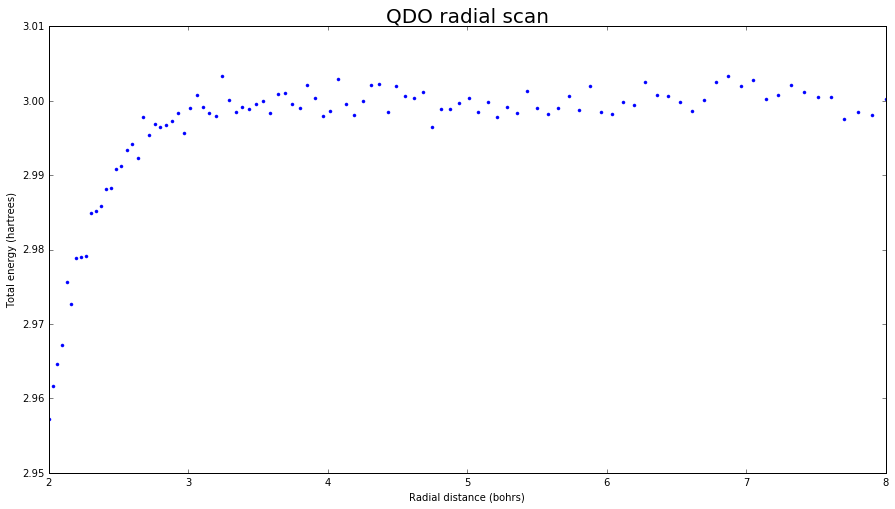

In [21]:
scan = np.loadtxt("./dmc-cuda/xenon-results-2")
q = 1.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")
#plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ dispersion")

plt.title("QDO radial scan".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
#plt.legend(loc=4, prop={"size":30})

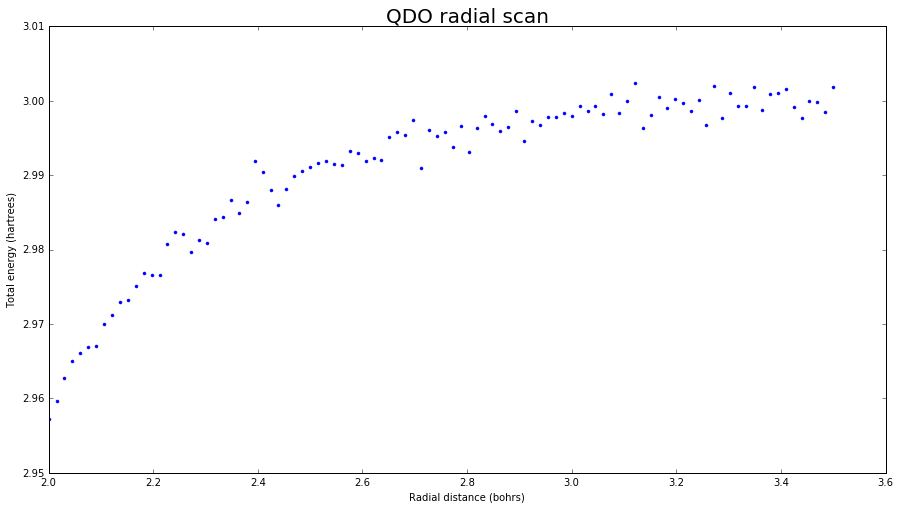

In [17]:
scan = np.loadtxt("./dmc-cuda/xenon-results-3")
q = 1.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.')
#plt.plot(xs, dimer_dispersion(xs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ dispersion")

plt.title("QDO radial scan".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")

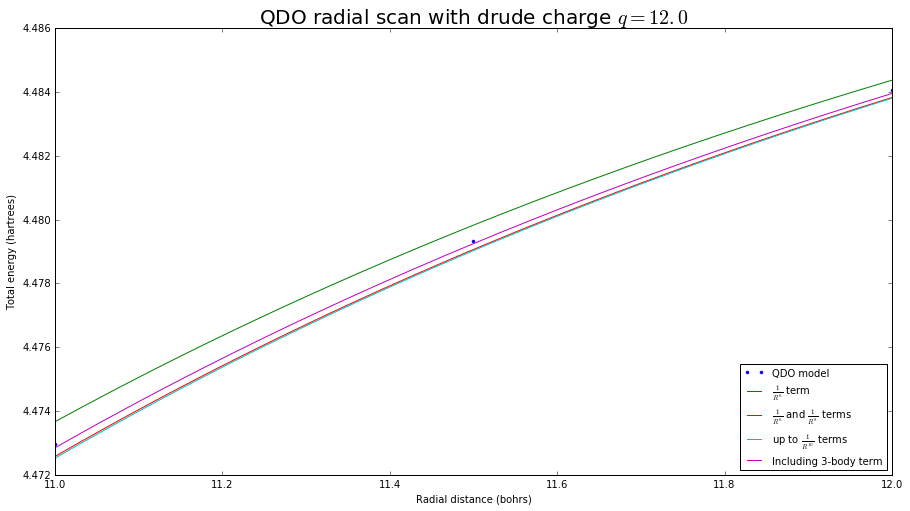

In [38]:
def C9(q, mu, omega, hbar=1.0):
    a1 = alpha1(q, mu, omega)
    return (3./16) * a1**3 * hbar * omega

def trimer_dispersion(xs, q, mu, omega, terms=3, hbar=1.0):
    c6  = C6(q, mu, omega)
    c8  = C8(q, mu, omega, hbar)
    c10 = C10(q, mu, omega, hbar)
    c9 = C9(q, mu, omega, hbar)
    
    answer = 3*monomer(omega, hbar)

    if terms >= 1:
        answer -= 3*c6/xs**6
    if terms >= 2:
        answer -= 3*c8/xs**8
    if terms >= 3:
        answer -= 3*c10/xs**10
        
    if terms >= 4:
        answer += (11./8)*c9/xs**9

    return answer


scan = np.loadtxt("./result-data/qdo-triatom-equilateral/equilateral-q-12.0-nwalkers-1e5-niters-4e4-configs-3-lower-11-upper-12")
q = 12.0

xs = scan[:,0]
plt.plot(xs, scan[:,1], '.', label="QDO model")\

xxs = np.linspace(xs[0],xs[-1], 200)
#xxs = np.linspace(11,12,200)
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=4), label="Including 3-body term")


plt.title("QDO radial scan with drude charge $q={}$".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
#plt.ylim(ymax=3.0001)
plt.legend(loc=4, prop={"size":10})

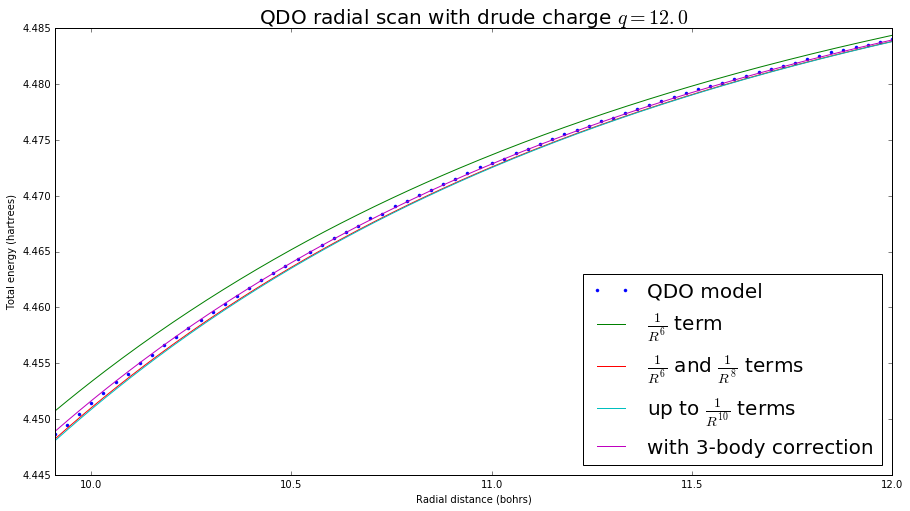

In [47]:
def C9(q, mu, omega, hbar=1.0):
    a1 = alpha1(q, mu, omega)
    return (3./16) * a1**3 * hbar * omega

def trimer_dispersion(xs, q, mu, omega, terms=3, hbar=1.0):
    c6  = C6(q, mu, omega)
    c8  = C8(q, mu, omega, hbar)
    c10 = C10(q, mu, omega, hbar)
    c9 = C9(q, mu, omega, hbar)
    
    answer = 3*monomer(omega, hbar)

    if terms >= 1:
        answer -= 3*c6/xs**6
    if terms >= 2:
        answer -= 3*c8/xs**8
    if terms >= 3:
        answer -= 3*c10/xs**10
        
    if terms >= 4:
        answer += (11./8)*c9/xs**9

    return answer


scan = np.loadtxt("./result-data/qdo-triatom-equilateral/equilateral-q-12.0-nwalkers-1e5-niters-4e4-configs-100-lower-9-upper-12")
q = 12.0

offset = 30

xs = scan[offset:,0]
plt.plot(xs, scan[offset:,1], '.', label="QDO model")\

xxs = np.linspace(xs[0],xs[-1], 200)
#xxs = np.linspace(11,12,200)
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=1), label="$\\frac{1}{R^6}$ term")
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=2), label="$\\frac{1}{R^6}$ and $\\frac{1}{R^8}$ terms")
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=3), label="up to $\\frac{1}{R^{10}}$ terms")
plt.plot(xxs, trimer_dispersion(xxs, q, 1.0, 1.0, terms=4), label="with 3-body correction")


plt.title("QDO radial scan with drude charge $q={}$".format(q), fontdict={"fontsize": 20})
plt.xlabel("Radial distance (bohrs)")
plt.ylabel("Total energy (hartrees)")
#plt.ylim(ymax=3.0001)
plt.xlim(xmin=xs[0])
plt.legend(loc=4, prop={"size":20})